<a href="https://colab.research.google.com/github/juliaeduarda-rg/Kaggle-Spaceship-Titanic/blob/main/kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

# IMPORTANDO O DF TREINO

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## IMPORTANDO DF DE TESTE

In [ ]:
test = pd.read_csv('/content/test.csv')
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


## TRATANDO OS DADOS NULOS

In [ ]:
for x in test.columns:
    if test[x].dtypes == object:
        test[x]= test[x].fillna(test[x].mode()[0])
    else:
        test[x]= test[x].fillna(test[x].median())

In [ ]:
test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]= test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].round().astype(float).astype(int)

In [ ]:
test1= pd.read_csv('/content/test.csv')

In [ ]:
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27,False,0,0,0,0,0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19,False,0,9,0,2823,0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31,False,0,0,0,0,0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38,False,0,6652,0,181,585,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20,False,10,0,635,0,0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34,False,0,0,0,0,0,Jeron Peter
4273,9269_01,Earth,False,G/160/P,TRAPPIST-1e,42,False,0,847,17,10,144,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,26,False,0,0,0,0,0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,TRAPPIST-1e,26,False,0,2680,0,0,523,Kitakan Conale


Tratando os nulos

In [ ]:
df.isnull().sum().sum()

2324

In [ ]:
for x in df.columns:
    if df[x].dtypes == object:
        df[x]= df[x].fillna(df[x].mode()[0])
    else:
        df[x]= df[x].fillna(df[x].median())

In [ ]:
df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']]= df[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].round().astype(float).astype(int)

In [ ]:
df.isnull().sum().sum()

0

Visualização

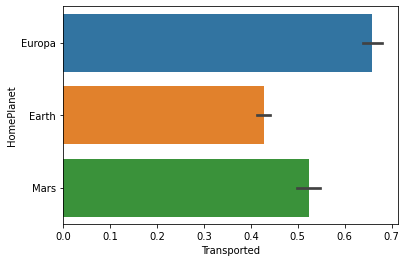

In [ ]:
sns.barplot(x ='Transported', y = 'HomePlanet', data= df)

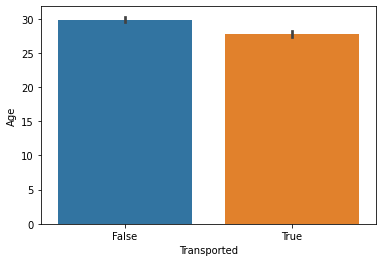

In [ ]:
sns.barplot(x ='Transported', y = 'Age', data= df)

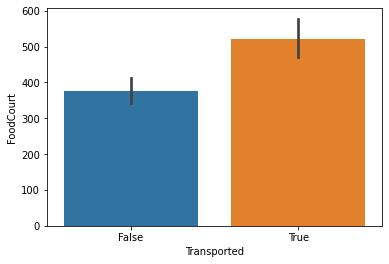

In [ ]:
sns.barplot(x ='Transported', y = 'FoodCourt', data= df)

## Separando X e Y

In [ ]:
y= df['Transported']

X= df.drop(columns= 'Transported')

In [ ]:
X.shape

(8693, 13)

In [ ]:
# O RandomUnderSampler é usado para realizar subamostragem aleatória da classe majoritária(s) escolhendo amostras aleatoriamente com ou sem reposição.
from imblearn.under_sampling import RandomUnderSampler

# O RandomOverSampler é usado para realizar sobreamostragem aleatória da classe minoritária escolhendo amostras aleatoriamente com reposição
from imblearn.over_sampling import RandomOverSampler


# Random Oversampler
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.70, test_size=0.30, random_state=42)

In [ ]:
test.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

# ENCODING

In [ ]:
columns_cat = X_train.select_dtypes(include = 'object').columns.to_list()

In [ ]:
one_encoder = OneHotEncoder(handle_unknown='ignore', sparse= False)

X_train_enco = one_encoder.fit_transform(X_train[columns_cat])

X_test_enco = one_encoder.transform(X_test[columns_cat])

In [ ]:
X_train.drop(columns_cat, axis=1, inplace=True)

X_test.drop(columns_cat, axis=1, inplace=True)

In [ ]:
X_train[one_encoder.get_feature_names_out()] = X_train_enco

X_test[one_encoder.get_feature_names_out()] = X_test_enco

In [ ]:
test_enco = one_encoder.transform(test1[columns_cat])

test1.drop(columns_cat, axis=1, inplace=True)

test1[one_encoder.get_feature_names_out()] = test_enco

METRICAS DE AVALIAÇÃO

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [ ]:
def run_model(name, model, X_train, y_train, X_test, y_test):
    # Treinando o modelo
    model.fit(X_train, y_train)

    # Fazendo as predições para o conjunto de treino e teste
    # Predizer os valores para o conjunto de treino
    # Por exemplo: y_pred_train = modelo.predict(conjunto_train)
    y_pred_train = model.predict(X_train)

    # Por exemplo: y_pred_test = modelo.predict(conjunto_test)
    y_pred_test = model.predict(X_test)


    # Use três métricas para avaliar o modelo no conjunto de treinamento e no teste
    # Precisão, F1-Score e Recall

    # Exemplo: 
    # pre_train = precision_score(y_train, y_pred_train)
    # pre_test = precision_score(y_test, y_pred_test)

    pre_train = precision_score(y_train, y_pred_train).round(2)
    pre_test = precision_score(y_test, y_pred_test).round(2)

    f1_train = f1_score(y_train, y_pred_train).round(2)
    f1_test = f1_score(y_test, y_pred_test).round(2)

    rec_train = recall_score(y_train, y_pred_train).round(2)
    rec_test = recall_score(y_test, y_pred_test).round(2)

    # Apresente aqui os resultados das métricas de cada modelo 
    print("================{}================".format(name))
    print("Precisão - Treino: {} Teste: {}".format(pre_train, pre_test))
    print("F1-Score - Treino: {} Teste: {}".format(f1_train, f1_test))
    print("Recall - Treino: {} Teste: {}".format(rec_train, rec_test))
    print(f"Accuracy{accuracy_score(y_train, y_pred_train)}")

    # Matriz de confusão
    matrix = confusion_matrix(y_test, y_pred_test)

    sns.heatmap(matrix, fmt='', annot=True, cmap="Blues")
    plt.xlabel("Predito")
    plt.ylabel("Real")
    plt.show()

## RODANDOS OS MODELOS

In [ ]:
svc = SVC()

rfc = RandomForestClassifier()

knn = KNeighborsClassifier()

dc = DecisionTreeClassifier()

================Random Forest================
Precisão - Treino: 1.0 Teste: 0.79
F1-Score - Treino: 1.0 Teste: 0.79
Recall - Treino: 1.0 Teste: 0.79
Accuracy1.0


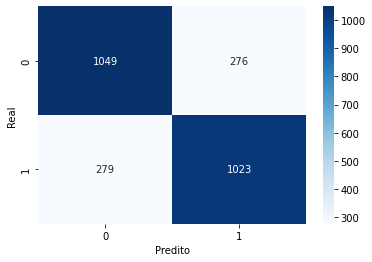

In [ ]:

# Random Forest
run_model("Random Forest", rfc, X_train, y_train, X_test, y_test)


================KNN================
Precisão - Treino: 0.83 Teste: 0.76
F1-Score - Treino: 0.83 Teste: 0.78
Recall - Treino: 0.84 Teste: 0.79
Accuracy0.8311306901615272


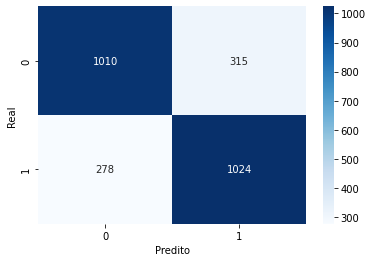

In [ ]:
#KNN
run_model("KNN", knn, X_train, y_train, X_test, y_test)

================Decision Tree================
Precisão - Treino: 1.0 Teste: 0.75
F1-Score - Treino: 1.0 Teste: 0.77
Recall - Treino: 1.0 Teste: 0.79
Accuracy1.0


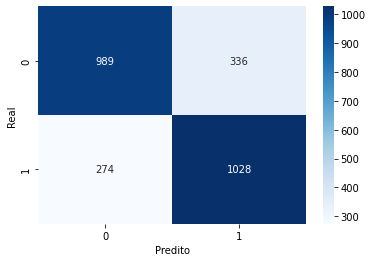

In [ ]:
# Decision Tree
run_model("Decision Tree", dc, X_train, y_train, X_test, y_test)

In [ ]:
y_pred_kaggle= rfc.predict(test1)

In [ ]:
y_pred_kaggle

array([ True, False,  True, ...,  True,  True,  True])

In [ ]:
# Save predictions in format used for competition scoring
output = pd.DataFrame({'PassengerId': test['PassengerId'],
                       'Transported': y_pred_kaggle})
output.to_csv('submission_rfc.csv', index=False)